In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
dfS = scaler.fit_transform(df)

In [7]:
dfS.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

In [8]:
covMat = np.cov(dfS, rowvar=False)

In [9]:
eigenVal, eigenVec = np.linalg.eig(covMat)

In [10]:
comps = 2

In [11]:
sortKey = np.argsort(eigenVal)[::-1][:comps]

In [12]:
eigenVal, eigenVec = eigenVal[sortKey], eigenVec[:,sortKey]

In [13]:
prinComps = np.dot(dfS,eigenVec)

In [14]:
prinComps

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

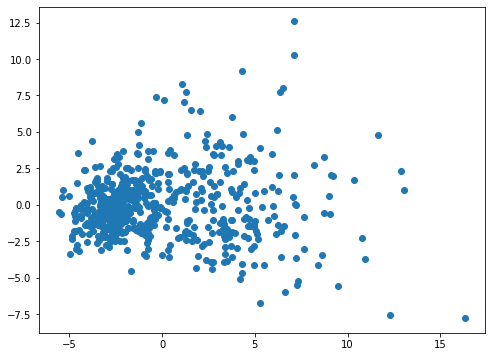

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(prinComps[:,0],prinComps[:,1])

In [17]:
from sklearn.datasets import load_breast_cancer

In [18]:
cancer = load_breast_cancer()

In [19]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

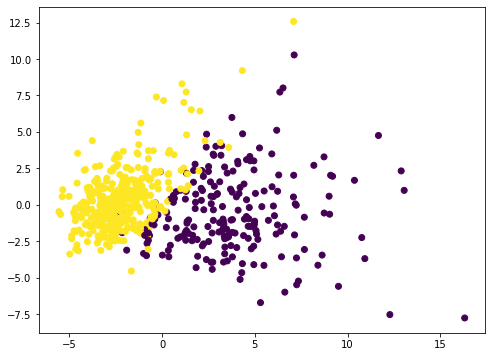

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(prinComps[:,0],prinComps[:,1],c=cancer['target'])

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [25]:
prinComps = pca.fit_transform(dfS)

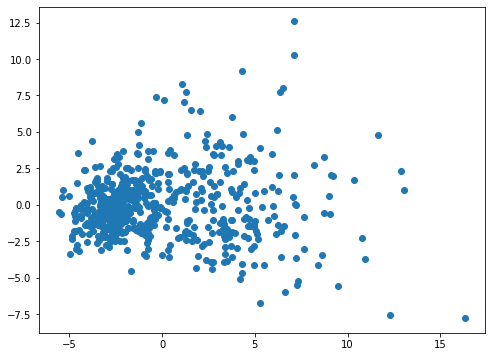

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(prinComps[:,0],prinComps[:,1])

In [27]:
dfComp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=df.columns)

<AxesSubplot:>

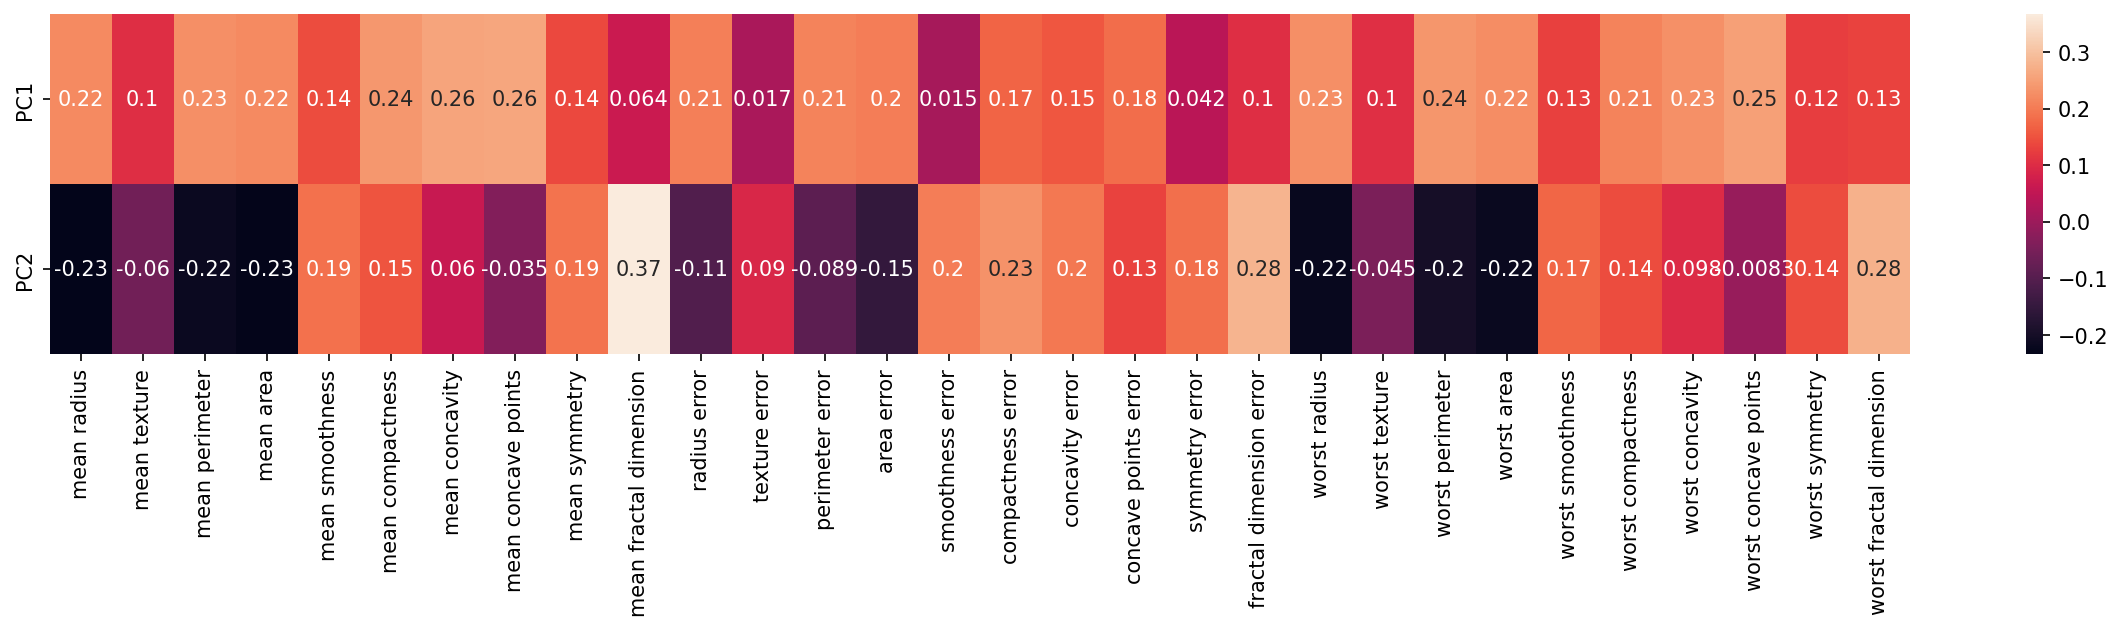

In [28]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(dfComp,annot=True)

In [29]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [30]:
np.sum(pca.explained_variance_ratio_)

0.6324320765155952

In [31]:
pca30 = PCA(n_components=30)

In [32]:
pca30.fit(dfS)

PCA(n_components=30)

In [33]:
np.sum(pca30.explained_variance_ratio_)

0.9999999999999999

In [34]:
explVar = []

for i in range(1,30):
    pca = PCA(n_components=i)
    pca.fit(dfS)
    var = np.sum(pca.explained_variance_ratio_)
    explVar.append(var)
    

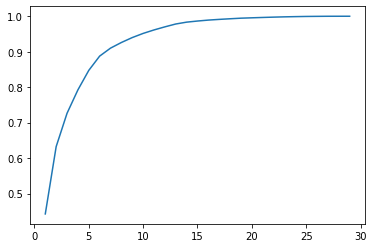

In [35]:
plt.plot(range(1,30),explVar)

In [36]:
digs = pd.read_csv('../DATA/digits.csv')

In [37]:
digs

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [39]:
pixs = digs.drop('number_label',axis=1)

In [41]:
pixs.shape

(1797, 64)

In [45]:
pixs.iloc[5].array

<PandasArray>
[ 0.0,  0.0, 12.0, 10.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 14.0, 16.0, 16.0,
 14.0,  0.0,  0.0,  0.0,  0.0, 13.0, 16.0, 15.0, 10.0,  1.0,  0.0,  0.0,  0.0,
 11.0, 16.0, 16.0,  7.0,  0.0,  0.0,  0.0,  0.0,  0.0,  4.0,  7.0, 16.0,  7.0,
  0.0,  0.0,  0.0,  0.0,  0.0,  4.0, 16.0,  9.0,  0.0,  0.0,  0.0,  5.0,  4.0,
 12.0, 16.0,  4.0,  0.0,  0.0,  0.0,  9.0, 16.0, 16.0, 10.0,  0.0,  0.0]
Length: 64, dtype: float64

In [49]:
four  = pixs.iloc[5].to_numpy()

In [50]:
four.reshape((8,8))

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

<AxesSubplot:>

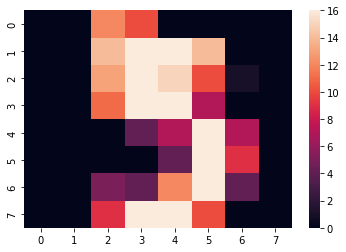

In [51]:
sns.heatmap(four.reshape((8,8)))

In [52]:
scaler = StandardScaler()

In [54]:
spixs = scaler.fit_transform(pixs)

In [55]:
pca = PCA(n_components=2)

In [59]:
pcs = pca.fit_transform(spixs)

In [57]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [58]:
np.sum(pca.explained_variance_ratio_)

0.21594970495859123

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


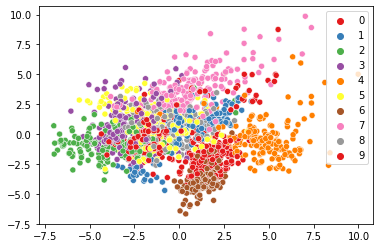

In [67]:
sns.scatterplot(pcs[:,0],pcs[:,1],=digs['number_label'],palette='Set2')
plt.legend()

In [68]:
pca3 = PCA(n_components=3)

In [70]:
things = pca3.fit_transform(spixs)

In [71]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


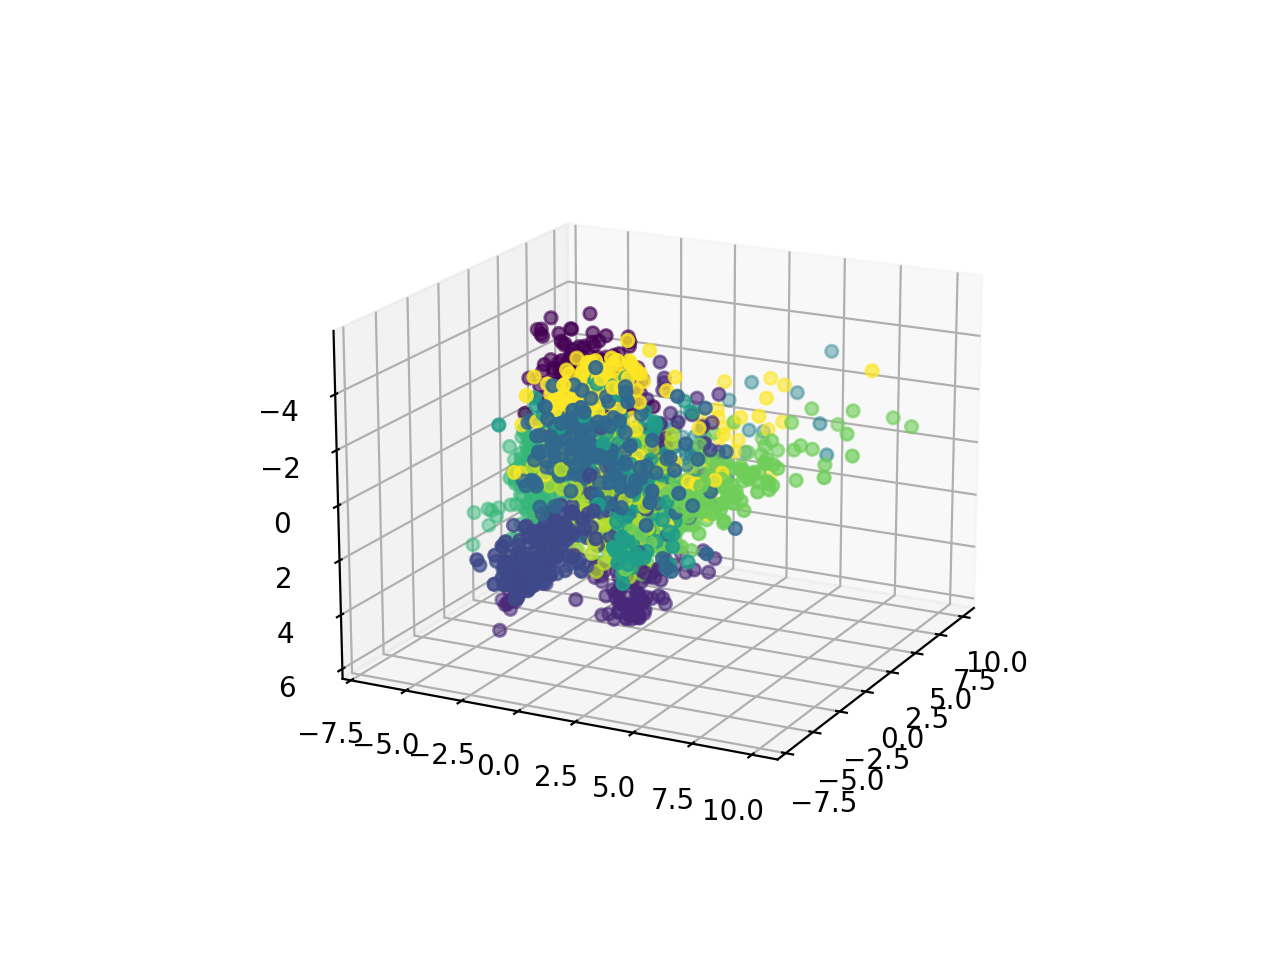

In [76]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter3D(things[:,0],things[:,1],things[:,2],c=digs['number_label'])